Example from - https://medium.com/@curiousily/tensorflow-for-hackers-part-iv-neural-network-from-scratch-1a4f504dfa8

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #newly installed
from pylab import rcParams

from preprocessing import * #newly installed
#from math_utils import *
from plotting import * #newly installed 

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 12, 6

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [2]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

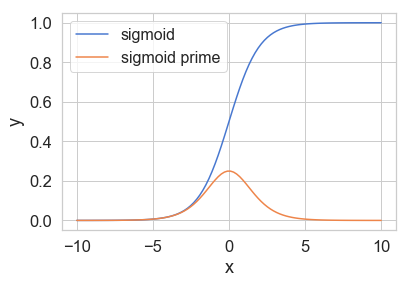

In [3]:
x = np.linspace(-10., 10., num=100)
sig = sigmoid(x)
sig_prime = sigmoid_prime(x)

plt.plot(x, sig, label="sigmoid")
plt.plot(x, sig_prime, label="sigmoid prime")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(prop={'size' : 16})
plt.show()

In [12]:
epochs = 50000
input_size, hidden_size, output_size = 2, 3, 1
LR = .1 # learning rate

In [13]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([ [0],   [1],   [1],   [0]])

In [14]:
w_hidden = np.random.uniform(size=(input_size, hidden_size))
w_output = np.random.uniform(size=(hidden_size, output_size))

In [15]:
for epoch in range(epochs):
 
    # Forward
    act_hidden = sigmoid(np.dot(X, w_hidden))
    output = np.dot(act_hidden, w_output)
    
    # Calculate error
    error = y - output
    
    if epoch % 5000 == 0:
        print('error sum ',sum(error))

    # Backward
    dZ = error * LR
    w_output += act_hidden.T.dot(dZ)
    dH = dZ.dot(w_output.T) * sigmoid_prime(act_hidden)
    w_hidden += X.T.dot(dH)

error sum  [-1.32772027]
error sum  [0.00876344]
error sum  [0.02705811]
error sum  [0.05056249]
error sum  [0.06313002]
error sum  [0.02331115]
error sum  [0.00010544]
error sum  [1.88873319e-06]
error sum  [3.44972175e-08]
error sum  [6.30302921e-10]
